In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as DF

Since m = 1, p = v
Then Hamilton's canonical equations for the harmonic oscillator are defined as follows.

$\frac{dx}{dt} = v = \frac{\partial H}{\partial p}$

$\frac{dp}{dt} = a = -\frac{\partial H}{\partial x}$


In [6]:
#Define constants
m = 1
k = 1


Simulation code

In [7]:
def simulation(x, p):
    global labels
    labels = ["x", "p", "p_dot"]
    
    p_dot = -k*x
    # a) set initial conditions
    old_coords = [x, p, p_dot]
    
    # Coordinates list to record simulation dynamics
    global coordinates_list 
    coordinates_list = [[x], [p], [p_dot]]
    
     # Define number of steps between measurement recordings
    record_steps = 10
    
    # Timestep
    delta_t = (0.0001)
    
    simulation_repetitions = 1000000
    
    i = 0

    # Repeating algorithm
    while i < simulation_repetitions:
            
        x_old = old_coords[0]
        p_old = old_coords[1]
        p_dot_old = old_coords[2]
        
        # b) Define new position of the simulated particle (x_new)
        x_new = x_old + p_old * delta_t + 1/2 * p_dot_old * delta_t**2 # Velocity Verlet algorithm 1.

        # c) Use Hamiltonian canonical equations to get new p_dot value
        p_dot_new = - k * x_new

        # d) Use Velocity Verlet 2 to get new momentum
        p_new = p_old + 1/2 * (p_dot_new + p_dot_old) * delta_t # Velocity Verlet alogorithm 2.    
        
        new_coordinates = [x_new, p_new, p_dot_new]

        # Recording position, momentum, and rate of change of momentum every 10th step
        if i % record_steps == 0:
            h = 0

            while h < len(coordinates_list):
                coordinates_list[h].append(new_coordinates[h])
                #coordinates_list[h] = np.append(coordinates_list[h], new_coordinates[h])
                h += 1
                
                
        # Update new coordinates

        old_coords = new_coordinates

        i += 1
    
    times = np.arange(0,simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)
    
    coords_dict = {"times" : times, labels[0] : coordinates_list[0], labels[0] : coordinates_list[0], 
                  labels[1] : coordinates_list[1], labels[2] : coordinates_list[2]}
    
    global Coords
    Coords = DF(coords_dict, index = coords_dict["times"], columns = labels)

IndexError: list index out of range

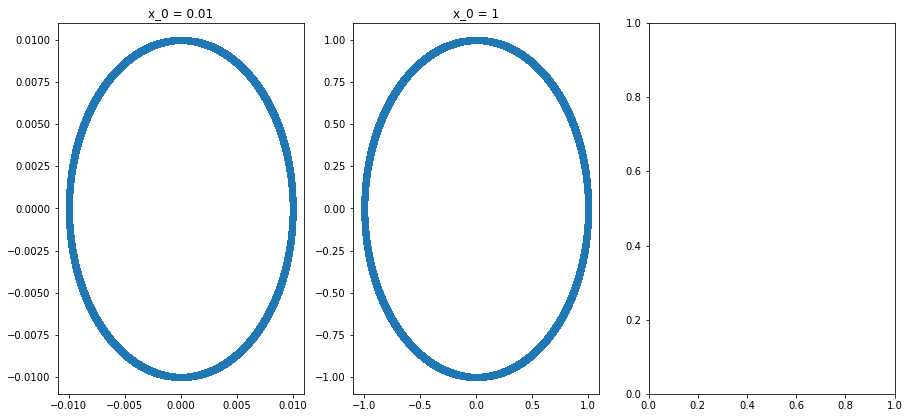

In [8]:
list = [0.01, 1, 10, 100, 500, 1000]
label = ["x_0 = 0.01", "x_0 = 1","x_0 = 10", "x_0 = 100", "x_0 = 500", "x_0 = 1000"]

plt.figure(figsize = (15,15))

i = 0
while i < 6:
    #simulation(x, p, p_dot)
    simulation(list[i], 0)
    
    plt.subplot(2,3,i+1)
    plt.plot(Coords[labels[i]],Coords[labels[i+1]], "o")    
    plt.title(f"{label[i]}")
    i += 1
    


In [9]:
Coords.label

AttributeError: 'DataFrame' object has no attribute 'label'

In [10]:
def H_1(x,p):
    return p**2/(2*m) + 1/2 * k * x**2

F = H_1(Coords["x"].values, Coords["p"].values)
G = np.isclose(F, 0.00005, atol = 0.0000000001)
np.where(G == False)

(array([     0,      1,      2, ...,  99998,  99999, 100000], dtype=int64),)

In [11]:
Coords

,x,p,p_dot
0.000,10.000000,0.000000,-10.000000
0.001,10.000000,-0.001000,-10.000000
0.002,9.999994,-0.011000,-9.999994
0.003,9.999978,-0.021000,-9.999978
0.004,9.999952,-0.031000,-9.999952
...,...,...,...
99.996,8.598274,5.105849,-8.598274
99.997,8.603375,5.097248,-8.603375
99.998,8.608468,5.088642,-8.608468
99.999,8.613552,5.080031,-8.613552


In [12]:
simulation(10,0)

In [13]:
Coords[0]

KeyError: 0

In [ ]:
Initial = H_1(10,0)
G = np.isclose(H_1(Coords["x"], Coords["p"]), Initial, atol = 0.000000001)
np.where(G==False)